## 1절. 프로젝트 개요

## 2절. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

cust = pd.read_csv('dataset/CUST_DATA.csv', encoding='utf-16')
claim = pd.read_csv('dataset/CLAIM_DATA.csv', encoding='utf-16')

### 2.1 CUST_DATA

In [3]:
# 1. 기본 정보 탐색
print(cust.shape)
print(cust.info())

(22400, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           22400 non-null  int64  
 1   DIVIDED_SET       22400 non-null  int64  
 2   SIU_CUST_YN       20607 non-null  object 
 3   SEX               22400 non-null  int64  
 4   AGE               22400 non-null  int64  
 5   RESI_COST         22400 non-null  int64  
 6   RESI_TYPE_CODE    21146 non-null  float64
 7   FP_CAREER         22400 non-null  object 
 8   CUST_RGST         21944 non-null  float64
 9   CTPR              21779 non-null  object 
 10  OCCP_GRP_1        21805 non-null  object 
 11  OCCP_GRP_2        21805 non-null  object 
 12  TOTALPREM         16609 non-null  float64
 13  MINCRDT           12924 non-null  float64
 14  MAXCRDT           12924 non-null  float64
 15  WEDD_YN           21927 non-null  object 
 16  MATE_OCCP_GRP_1   10573 non-

In [4]:
cust.describe(include='all')

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,20607,22400.000000,22400.000000,22400.000000,21146.000000,22400,21944.000000,21779,21805,21805,1.660900e+04,12924.000000,12924.000000,21927,10573,10573,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,17,8,25,NaN,NaN,NaN,2,8,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,경기,8.기타,주부,NaN,NaN,NaN,Y,1.주부,주부,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18801,NaN,NaN,NaN,NaN,21182,NaN,5200,4879,4837,NaN,NaN,NaN,12010,2394,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11200.500000,1.080045,NaN,1.565134,44.734866,15914.413973,25.765251,NaN,198924.250638,NaN,NaN,NaN,2.998266e+07,5.838904,19.480656,NaN,NaN,NaN,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,NaN,0.495750,15.445707,14963.317519,20.691869,NaN,16989.329112,NaN,NaN,NaN,4.897438e+07,3.515198,32.363151,NaN,NaN,NaN,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,NaN,1.000000,2.000000,0.000000,11.000000,NaN,101.000000,NaN,NaN,NaN,5.000000e+02,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,NaN,1.000000,34.000000,6732.750000,20.000000,NaN,200306.000000,NaN,NaN,NaN,6.665459e+06,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,NaN,2.000000,46.000000,12222.000000,20.000000,NaN,200306.000000,NaN,NaN,NaN,1.622463e+07,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,NaN,2.000000,56.000000,20988.000000,30.000000,NaN,200402.000000,NaN,NaN,NaN,3.479439e+07,6.000000,7.000000,NaN,NaN,NaN,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000


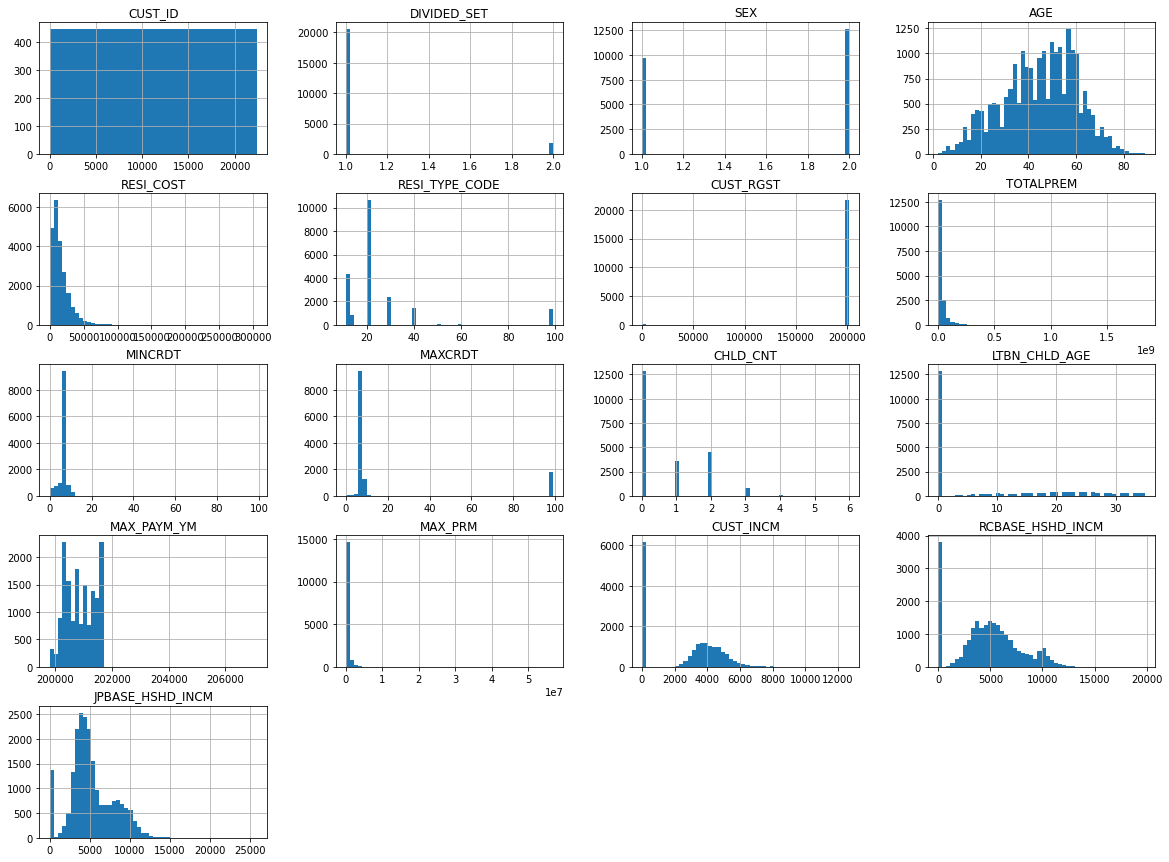

In [5]:
cust.hist(bins=50, figsize=(20, 15))
plt.show()

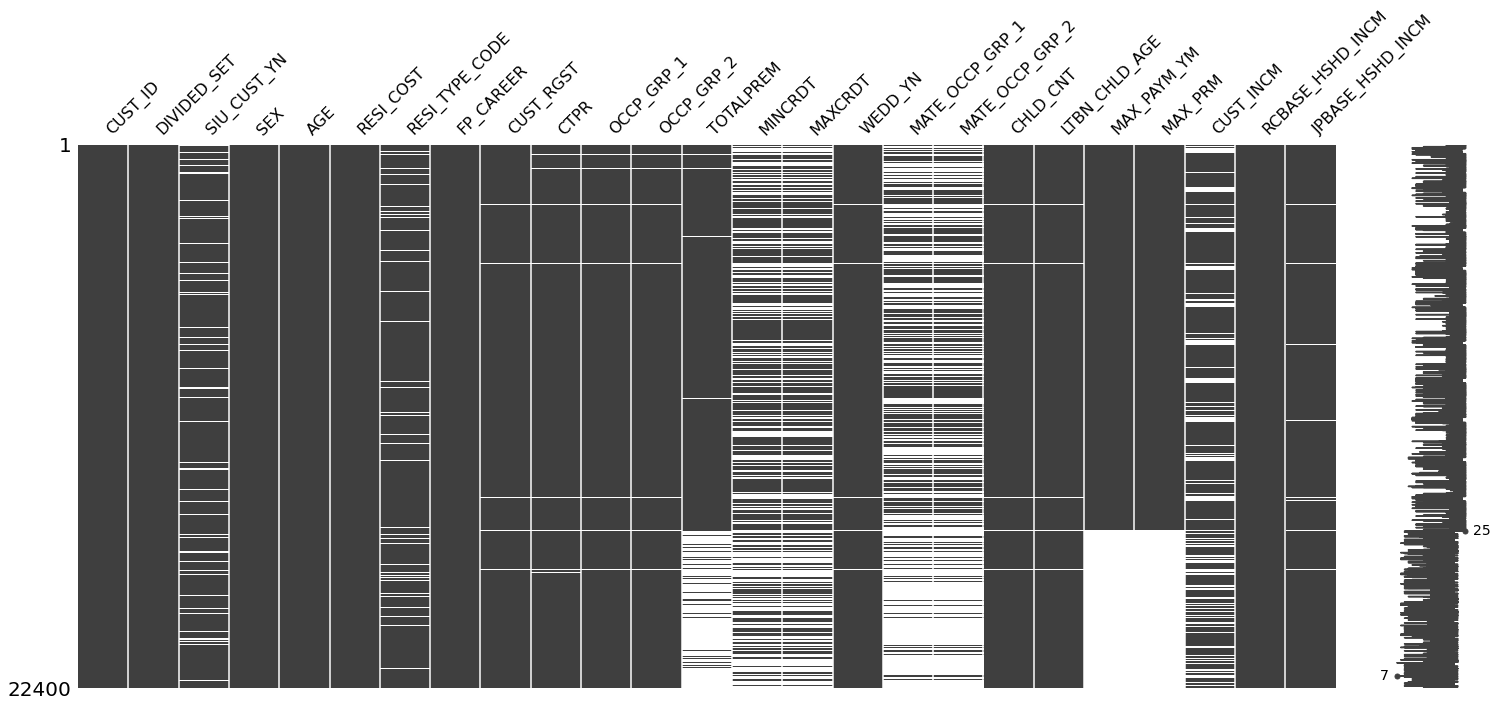

In [6]:
# 2. 결측치 분포 확인
import missingno
missingno.matrix(cust)
plt.show()

In [7]:
# 3. 변수별 정보 확인
cust['SIU_CUST_YN'].value_counts()

N    18801
Y     1806
Name: SIU_CUST_YN, dtype: int64

### 2.2 CLAIM_DATA

In [8]:
print(claim.shape)
print(claim.info())
print(claim.describe(include='all'))

(119020, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUST_ID          119020 non-null  int64  
 1   POLY_NO          119020 non-null  int64  
 2   ACCI_OCCP_GRP1   117603 non-null  object 
 3   ACCI_OCCP_GRP2   117603 non-null  object 
 4   CHANG_FP_YN      119020 non-null  object 
 5   CNTT_RECP_SQNO   119020 non-null  int64  
 6   RECP_DATE        119020 non-null  int64  
 7   ORIG_RESN_DATE   119020 non-null  int64  
 8   RESN_DATE        119020 non-null  int64  
 9   CRNT_PROG_DVSN   119020 non-null  int64  
 10  ACCI_DVSN        119020 non-null  int64  
 11  CAUS_CODE        119020 non-null  object 
 12  CAUS_CODE_DTAL   119020 non-null  object 
 13  DSAS_NAME        119020 non-null  object 
 14  DMND_RESN_CODE   119020 non-null  int64  
 15  DMND_RSCD_SQNO   119020 non-null  int64  
 16  HOSP_OTPA_STDT   86449 no

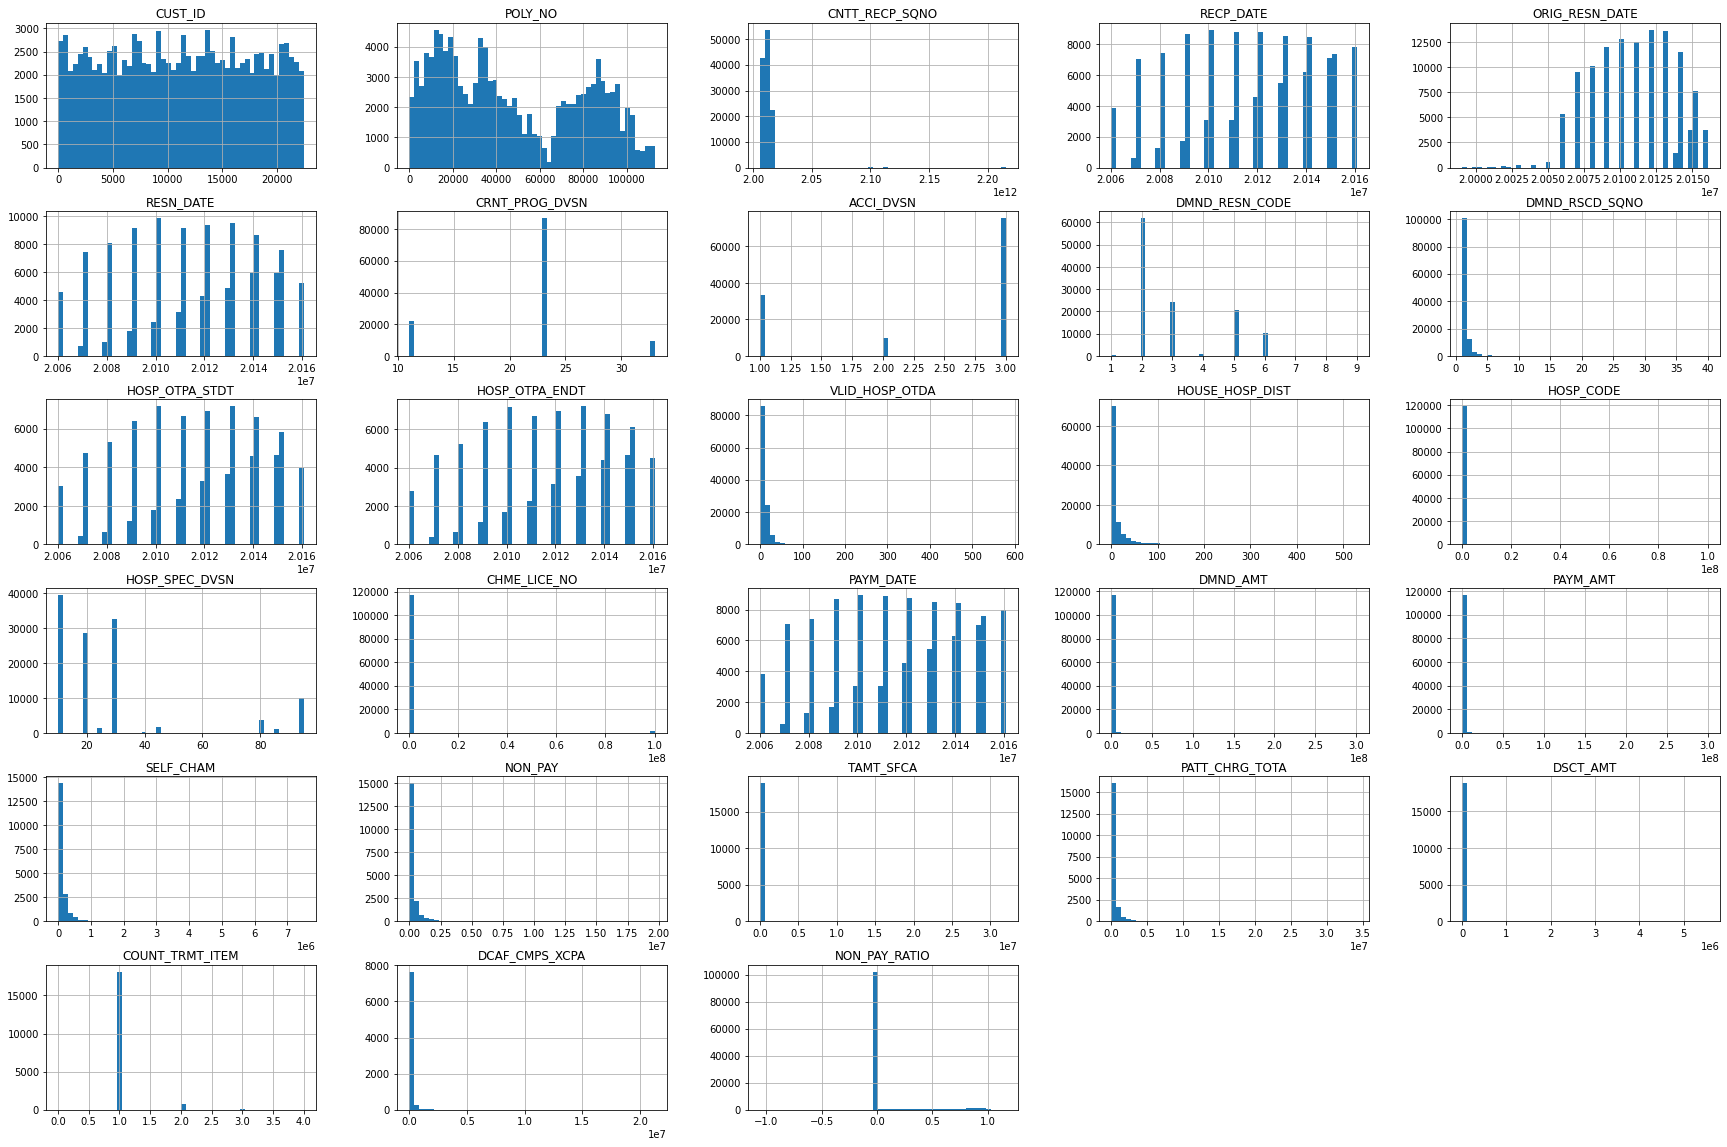

In [9]:
claim.hist(bins=50, figsize=(30, 20))
plt.show()

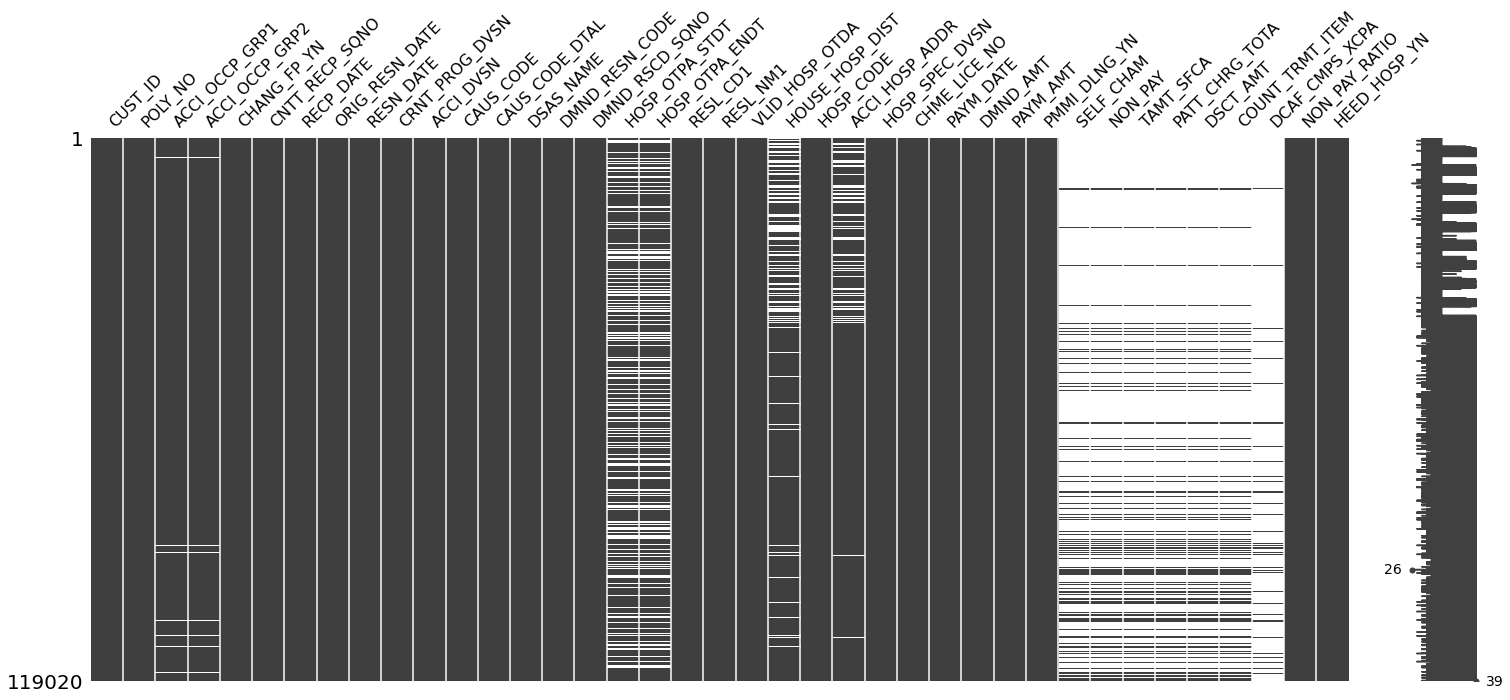

In [10]:
missingno.matrix(claim)
plt.show()

In [11]:
# 금감원 유의 병원 대상 여부 정보 확인
claim['HEED_HOSP_YN'].value_counts()

N    115685
Y      3335
Name: HEED_HOSP_YN, dtype: int64

In [12]:
# 유의 병원의 의사 라이센스 번호 체크 횟수
claim[claim['HEED_HOSP_YN'] == 'Y']['CHME_LICE_NO'].value_counts()

4109     171
10952     62
4925      61
25697     59
2830      56
        ... 
18992      1
23322      1
3863       1
2012       1
68         1
Name: CHME_LICE_NO, Length: 830, dtype: int64

In [13]:
# 보험 청구 많이 했을수록 사기자일 확률 높을 것이라는 가정하에 보험 청구횟수 확인
claim['CUST_ID'].value_counts()[claim['CUST_ID'].value_counts() > 50]

15109    98
13477    93
371      93
12678    91
1893     90
1737     90
540      88
6797     88
501      87
18887    87
20828    87
13990    84
4819     84
11807    82
13432    82
8971     81
21540    80
15701    74
15070    72
20122    71
9373     71
6236     70
3720     68
10625    68
2031     68
9123     67
14425    67
9568     66
1800     65
1005     64
1962     64
9258     62
3716     62
11197    61
10408    61
10221    61
15010    60
13925    59
13396    58
5225     58
525      57
10136    57
13644    57
14629    56
2264     56
7956     56
15964    56
13408    55
5892     55
21575    55
4567     54
11351    54
19390    54
21171    54
19489    54
7253     54
302      53
7173     51
904      51
7240     51
Name: CUST_ID, dtype: int64

In [14]:
# 특정 아이디 가지는 cust 정보 탐색
cust[cust['CUST_ID'] == 15109]

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
16871,15109,1,Y,1,57,18445,12.0,N,200404.0,인천,2.자영업,자영업,18094762.0,NaN,NaN,Y,2.자영업,3차산업 종사자,1.0,34.0,NaN,NaN,4372.0,6125,8448.0


## 3절. Feature Engineering

### 3.1 CUST_DATA 전처리

In [16]:
# 1. 나이 관련 변수 연령대로 변환
cust['AGE'] = cust['AGE'].map(lambda x: int(x//10))
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [17]:
cust['LTBN_CHLD_AGE'] = cust['LTBN_CHLD_AGE'].map(lambda x: x//10)

In [18]:
# 2. 변수 삭제
cust.drop('OCCP_GRP_2', axis=1, inplace=True)

In [19]:
set(cust.OCCP_GRP_1)
cust['OCCP_GRP_1'] = cust['OCCP_GRP_1'].map(lambda x:str(x)[2:])
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


In [20]:
cust.drop('MATE_OCCP_GRP_2', axis=1, inplace=True)

In [21]:
set(cust.MATE_OCCP_GRP_1)
cust['MATE_OCCP_GRP_1'] = cust['MATE_OCCP_GRP_1'].map(lambda x:str(x)[2:])
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


In [22]:
# Date 관련 변수 삭제
cust.drop(['CUST_RGST', 'MAX_PAYM_YM'], axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


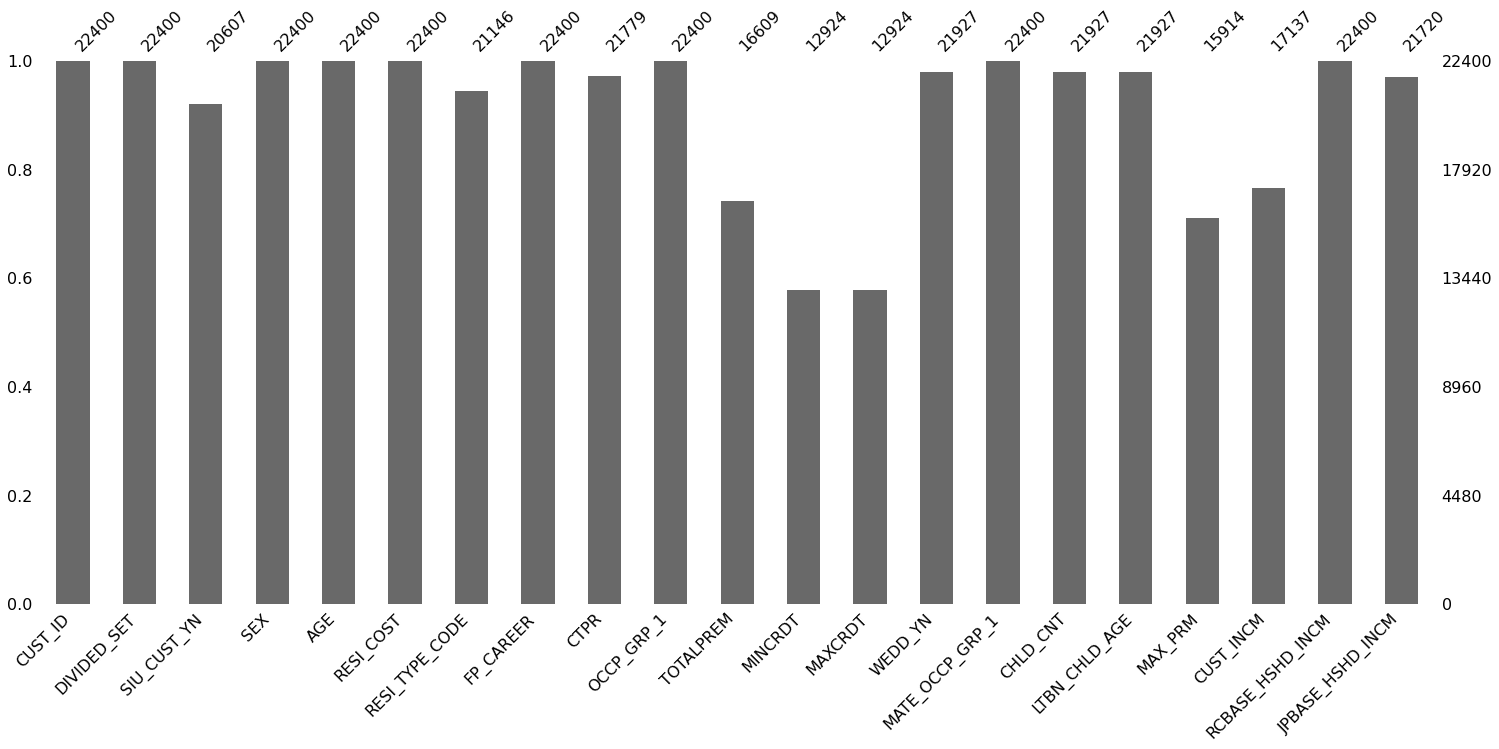

In [23]:
# null 값 확인
import missingno
missingno.bar(cust)
plt.show()

In [24]:
cust.isnull().sum()

CUST_ID                0
DIVIDED_SET            0
SIU_CUST_YN         1793
SEX                    0
AGE                    0
RESI_COST              0
RESI_TYPE_CODE      1254
FP_CAREER              0
CTPR                 621
OCCP_GRP_1             0
TOTALPREM           5791
MINCRDT             9476
MAXCRDT             9476
WEDD_YN              473
MATE_OCCP_GRP_1        0
CHLD_CNT             473
LTBN_CHLD_AGE        473
MAX_PRM             6486
CUST_INCM           5263
RCBASE_HSHD_INCM       0
JPBASE_HSHD_INCM     680
dtype: int64

In [25]:
# null 값 많은 열 삭제
cust.drop(['MINCRDT', 'MAXCRDT'], axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


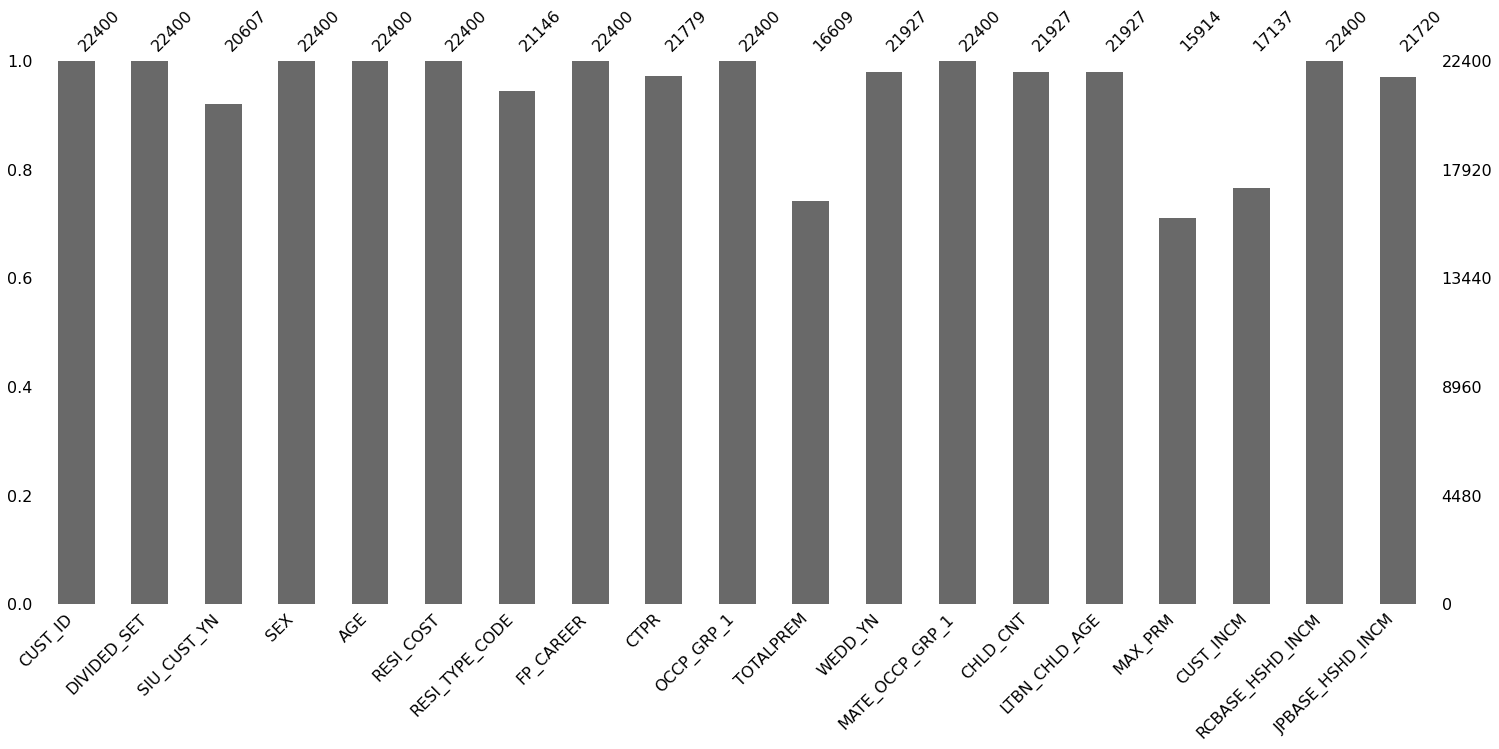

In [26]:
missingno.bar(cust)
plt.show()

In [27]:
# 개인소득 결측치 처리
# 고객의 연령, 직업, 보험료 수준 등을 통한 고객의 개인소득 추정
cust[cust.CUST_INCM.isnull()].head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,NaN,0,6449.0
10,13,1,Y,1,6,8140,50.0,N,경기,제조업,33261687.0,Y,서비스,0.0,0.0,483850.0,NaN,4066,NaN
13,17,1,N,1,6,14027,20.0,N,대구,서비스,10122595.0,Y,주부,0.0,0.0,229500.0,NaN,4538,5869.0
15,19,1,N,1,6,15833,20.0,N,경기,자영업,11323581.0,Y,주부,1.0,3.0,300000.0,NaN,5075,6120.0


In [28]:
occp_age_cust = cust.pivot_table(index=['AGE', 'OCCP_GRP_1'],
                                values='CUST_INCM', aggfunc='mean')
occp_age_cust.head()

CUST_INCM
AGE OCCP_GRP_1             
2   1차산업        3208.333333
    n           2487.000000
    기타            10.167982
    사무직         2740.725979
    서비스         2773.720000

In [29]:
occp_age_cust['CUST_INCM']
occp_age_cust

CUST_INCM
AGE OCCP_GRP_1             
2   1차산업        3208.333333
    n           2487.000000
    기타            10.167982
    사무직         2740.725979
    서비스         2773.720000
    자영업         2931.117647
    전문직         2761.718750
    제조업         2812.219512
    주부             0.000000
3   1차산업        3474.411765
    n           3534.750000
    기타           220.549828
    사무직         3571.076851
    서비스         3590.325167
    자영업         3954.316076
    전문직         3604.069243
    제조업         3569.818966
    주부             0.000000
4   1차산업        3969.931818
    n           4204.710526
    기타          2731.950000
    사무직         4673.625914
    서비스         4157.223301
    자영업         4723.804674
    전문직         4455.028694
    제조업         4291.350000
    주부             0.000000
5   1차산업        4145.708738
    n           4627.300000
    기타          3363.211429
    사무직         5502.984463
    서비스         4080.302619
    자영업         4938.364428
    전문직         4848.943489
    제조업         4516.024775
    주부             0.000000
6   1차산업        4147.000000
    n           4380.400000
    기타          3190.096774
    사무직         5403.133333
    서비스         3881.650000
    자영업         4813.837838
    전문직         4898.708333
    제조업         4322.930233
    주부             0.000000

In [31]:
import warnings
warnings.filterwarnings('ignore')

def fill_income(row):
    try:
        avg_income = occp_age_cust['CUST_INCM'][row.OCCP_GRP_1]
    except:
        avg_income = 0
    
    return avg_income

cust['CUST_INCM_NEW'] = None
cust['CUST_INCM_NEW'][cust.CUST_INCM.isnull()] = \
cust[cust.CUST_INCM.isnull()].apply(fill_income, axis=1)

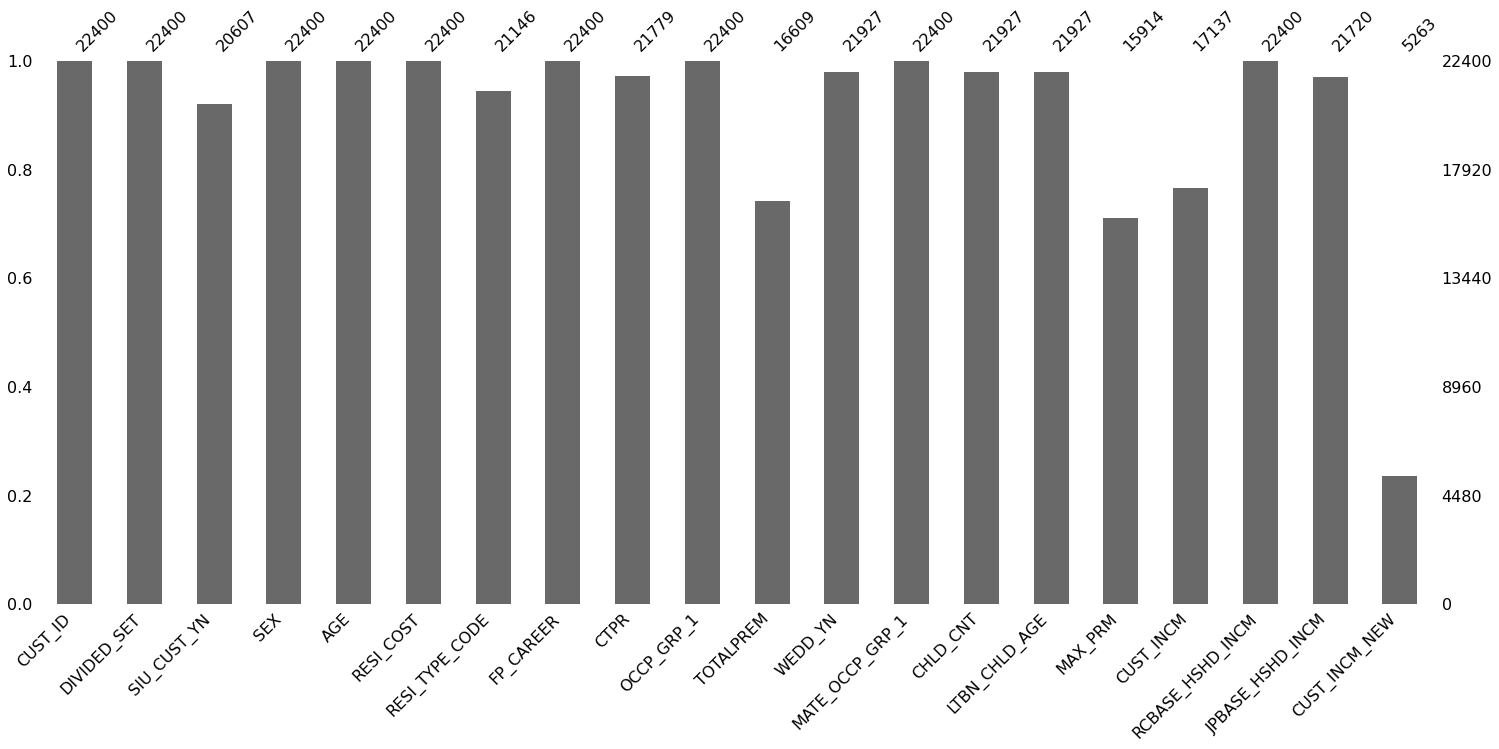

In [32]:
missingno.bar(cust)
plt.show()

In [33]:
cust["CUST_INCM"][cust.CUST_INCM.isnull()] = \
cust[cust.CUST_INCM.isnull()].apply(fill_income, axis=1)
del cust["CUST_INCM_NEW"]

cust.head(10)

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,0.0,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,0.0,0,6449.0
6,7,1,Y,2,6,11388,30.0,N,서울,서비스,46522197.0,Y,n,1.0,2.0,482077.0,3611.0,0,3611.0
7,8,1,N,1,5,86527,20.0,Y,서울,자영업,151085847.0,Y,자영업,1.0,2.0,10283415.0,6465.0,12219,12063.0
8,9,1,N,1,5,22638,20.0,N,서울,전문직,3666050.0,Y,전문직,1.0,1.0,29.0,4975.0,7553,9821.0
9,12,1,N,1,5,37222,20.0,N,서울,전문직,135719262.0,Y,전문직,2.0,2.0,724768.0,8780.0,10466,13858.0


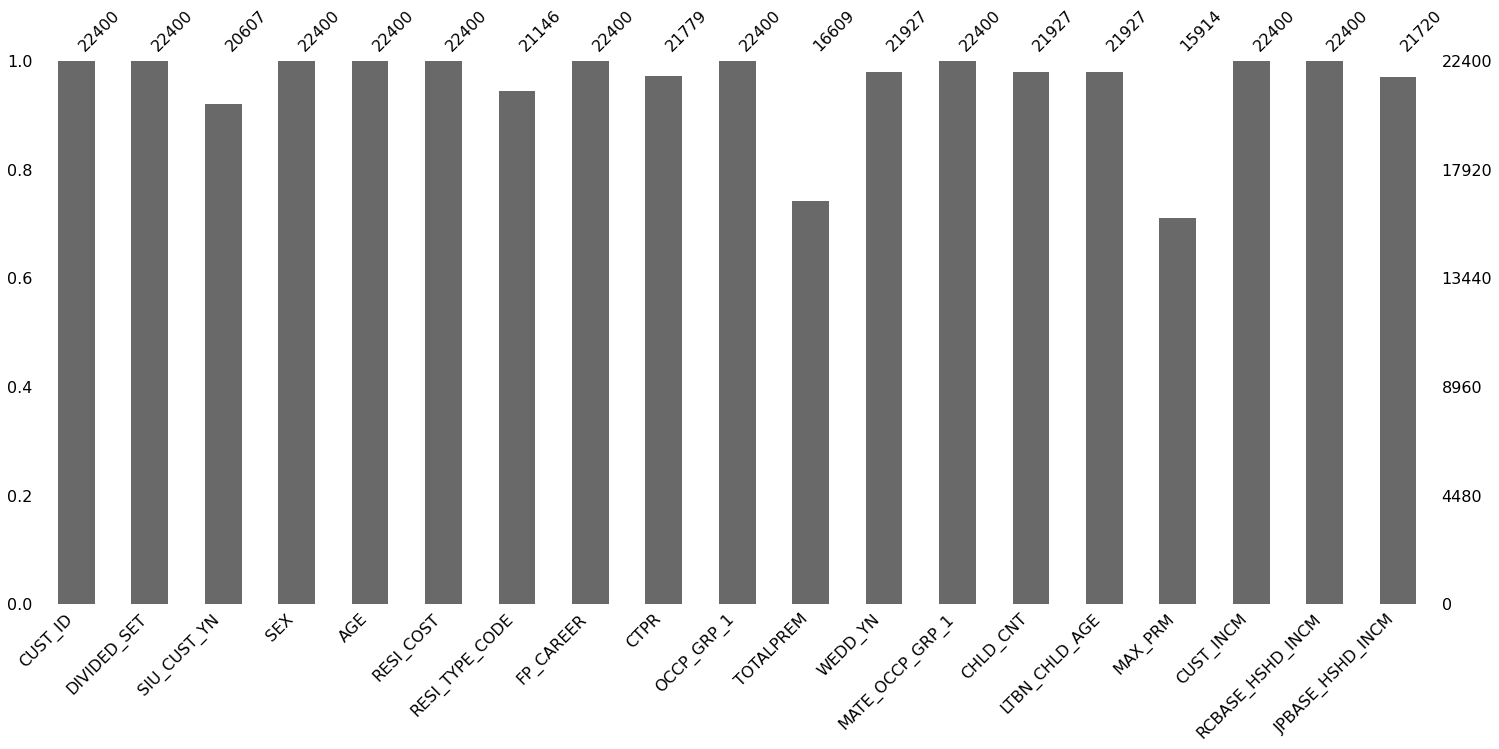

In [34]:
missingno.bar(cust)
plt.show()

In [35]:
# 가구 소득 결측치 처리
# 직업별 가구 평균 소득 계산 및 가구 소득 결측치 처리
avg_income_by_job = cust.pivot_table(index=["OCCP_GRP_1"],
                                      values=["JPBASE_HSHD_INCM"],
                                      aggfunc="mean")

avg_income_by_job

,JPBASE_HSHD_INCM
OCCP_GRP_1,
1차산업,4256.579937
n,4807.235294
기타,4379.457519
사무직,5529.133980
서비스,5464.250453
자영업,6466.752099
전문직,5979.159369
제조업,5403.936282
주부,4744.600627


In [36]:
def fill_jbbase_incm(row):
    try:
        avg_jpbase = jpbase_df["JPBASE_HSHD_INCM"][row.OCCP_GRP_1]
    except:
        avg_jpbase = 0
    return avg_jpbase

cust['JPBASE_NEW'] = None
cust['JPBASE_NEW'][cust.JPBASE_HSHD_INCM.isnull()] = \
cust[cust['JPBASE_HSHD_INCM'].isnull()].apply(fill_jbbase_incm, axis=1)

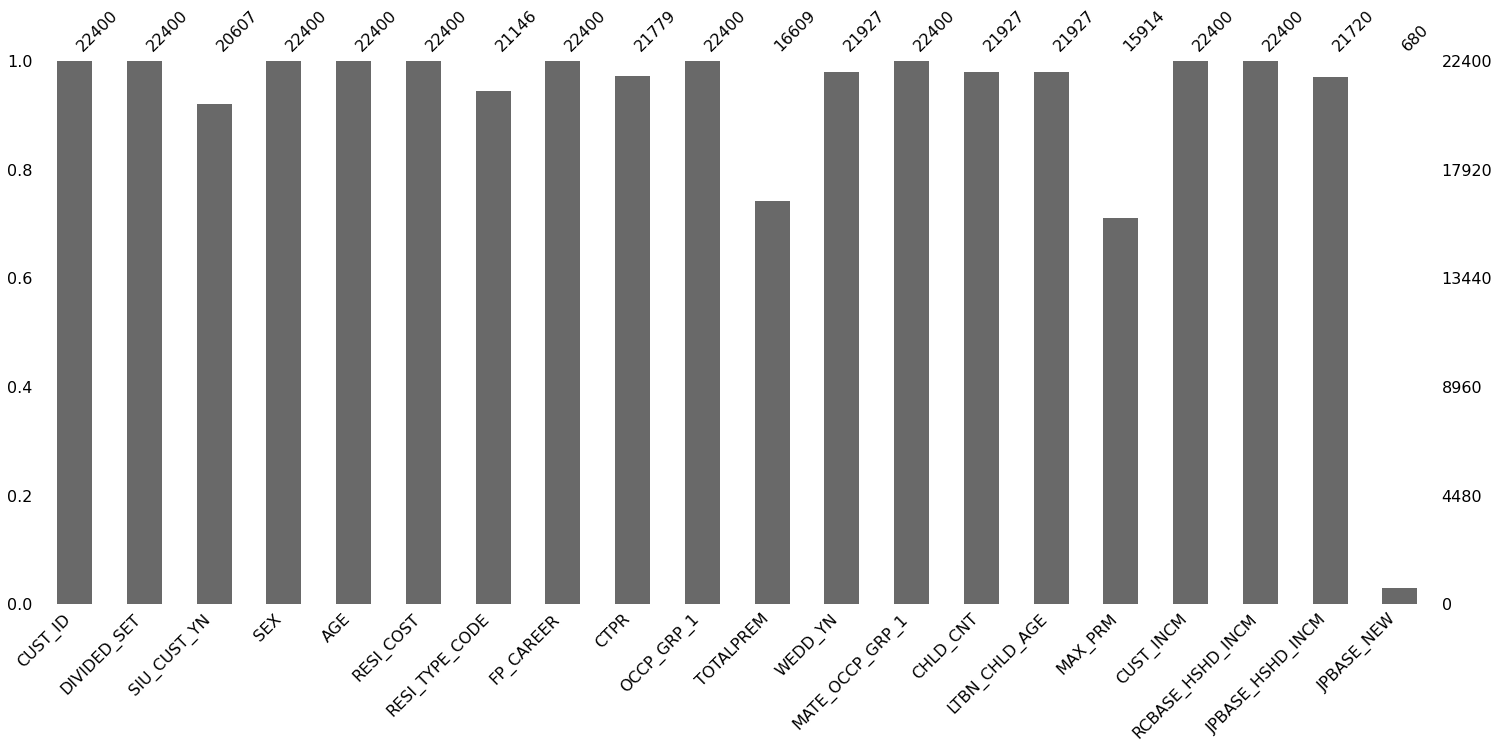

In [37]:
missingno.bar(cust)
plt.show()

In [38]:
cust['JPBASE_HSHD_INCM'][cust.JPBASE_HSHD_INCM.isnull()] = \
cust[cust['JPBASE_HSHD_INCM'].isnull()].apply(fill_jbbase_incm, axis=1)
del cust["JPBASE_NEW"]

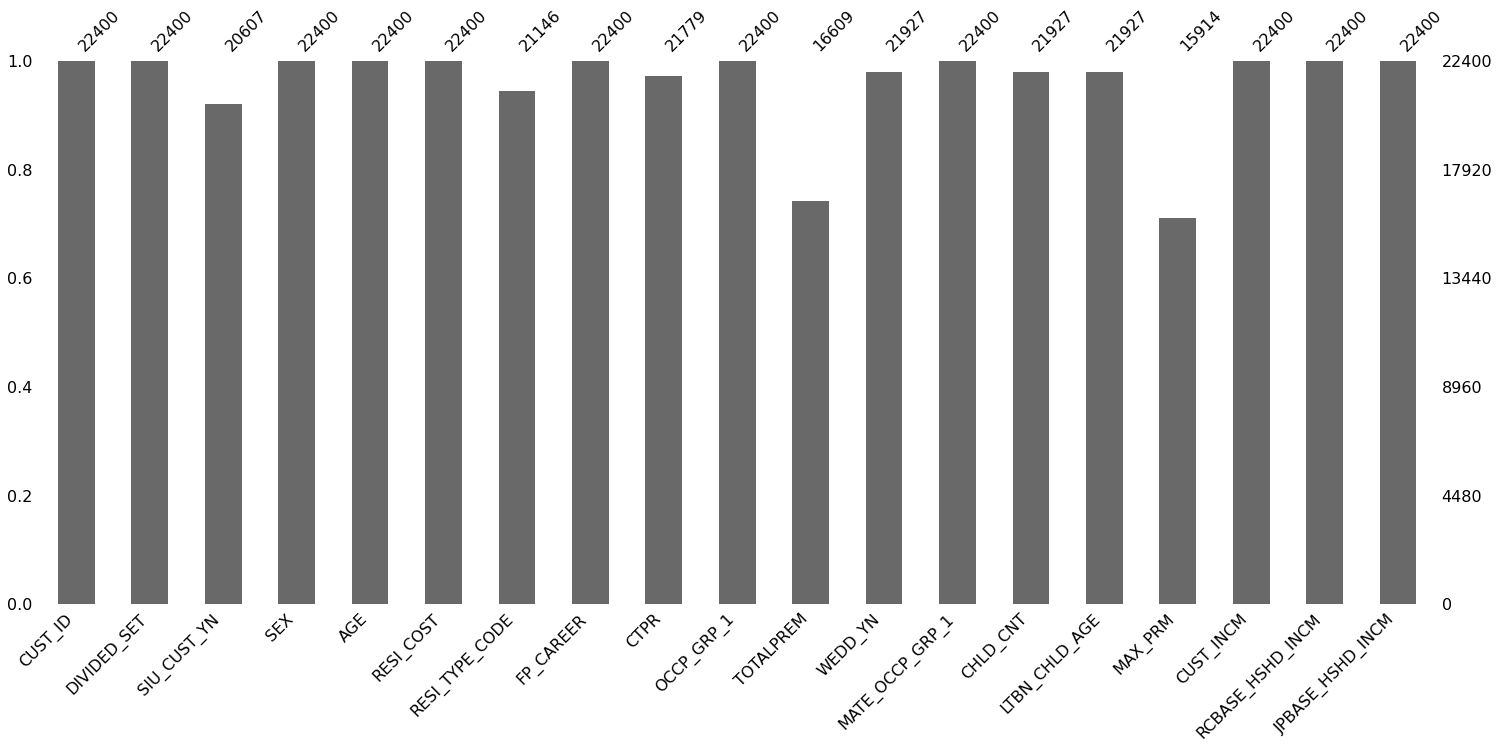

In [39]:
missingno.bar(cust)
plt.show()

In [40]:
# 기타 변수 결측치 처리
cust['RESI_TYPE_CODE'].value_counts()

20.0    10677
12.0     2549
30.0     2379
11.0     1797
40.0     1432
99.0     1341
13.0      816
50.0       69
60.0       55
70.0       31
Name: RESI_TYPE_CODE, dtype: int64

In [41]:
# RESI_TYPE_CODE, CTPR : 결측치는 최빈값으로
cust['RESI_TYPE_CODE'].fillna(20, inplace=True)
cust['CTPR'].fillna('경기', inplace=True)

# WEDD_YN : 결측치는 N으로
cust['WEDD_YN'].fillna('N', inplace=True)

# LBTN_CHLD_AGE, CHLD_CNT, TOTALPREM, MAX_PRM : 결측치는 0으로
cust['LTBN_CHLD_AGE'].fillna(0, inplace=True)
cust['CHLD_CNT'].fillna(0, inplace=True)
cust['TOTALPREM'].fillna(0, inplace=True)
cust['MAX_PRM'].fillna(0, inplace=True)

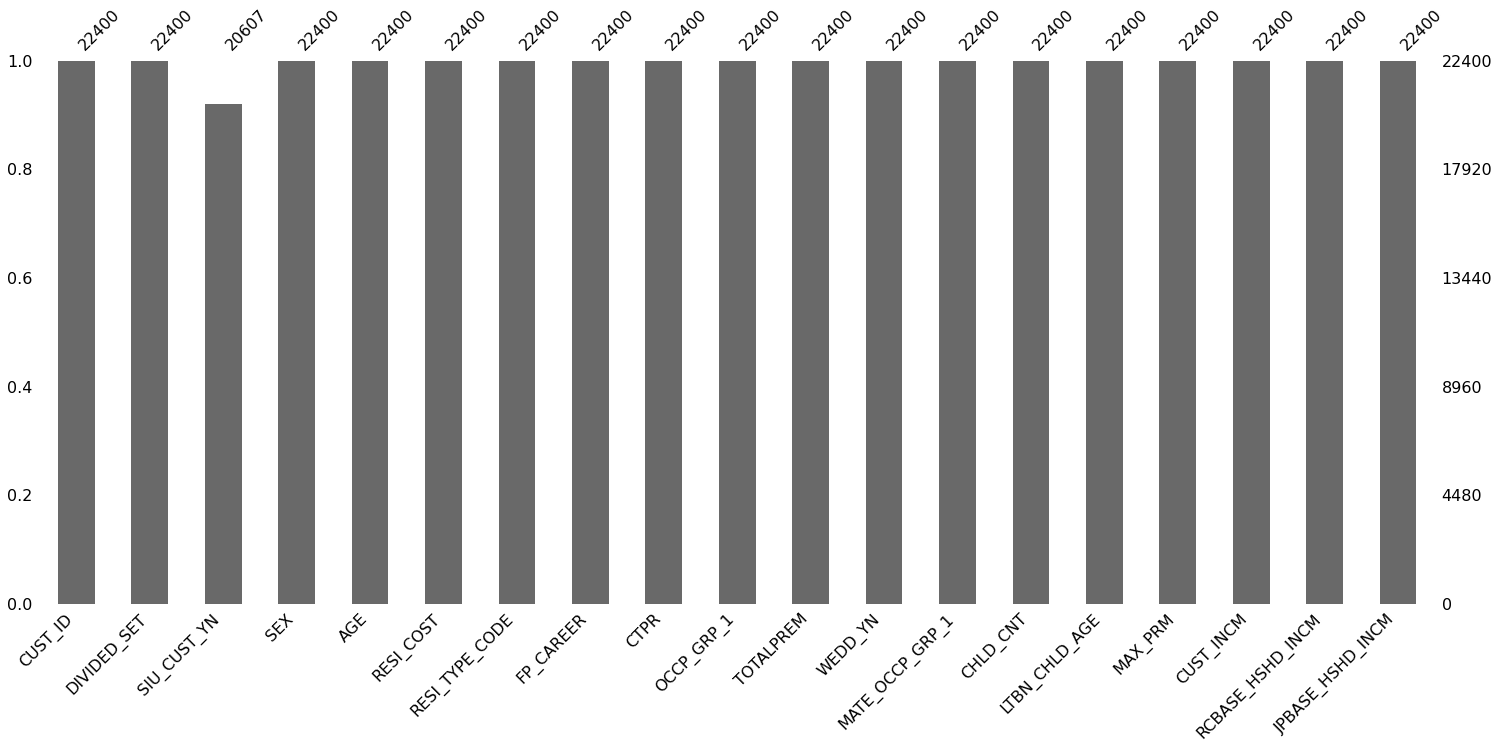

In [42]:
missingno.bar(cust)
plt.show()

In [44]:
# 중간 데이터 저장
cust.to_csv('dataset/refined_CUST_DATA.csv', index=False, encoding='utf-8-sig')

In [45]:
# 분석에 무의미하다고 판단되는 FP_CAREER 제거
cust.drop("FP_CAREER", axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,20.0,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,0.0,4270,5914.0
4,5,1,N,2,5,0,20.0,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


In [48]:
category = ["SEX", "RESI_TYPE_CODE", "CTPR", "OCCP_GRP_1", "WEDD_YN", "MATE_OCCP_GRP_1"]
dummy = pd.get_dummies(cust, columns=category)
dummy.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.0,10094,11337.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.0,9143,6509.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.0,0,4180.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,0.0,4270,5914.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.0,0,8885.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [49]:
dummy.to_csv("dataset/one_hot_encoded_CUST_DATA.csv", index=False, encoding="utf-8-sig")
del dummy

### 3.2 CLAIM_DATA 로부터 파생변수 만들기

In [50]:
import pandas as pd
cust = pd.read_csv("dataset/one_hot_encoded_CUST_DATA.csv", encoding="utf-8-sig")
claim = pd.read_csv("dataset/CLAIM_DATA.csv", encoding="utf-16")

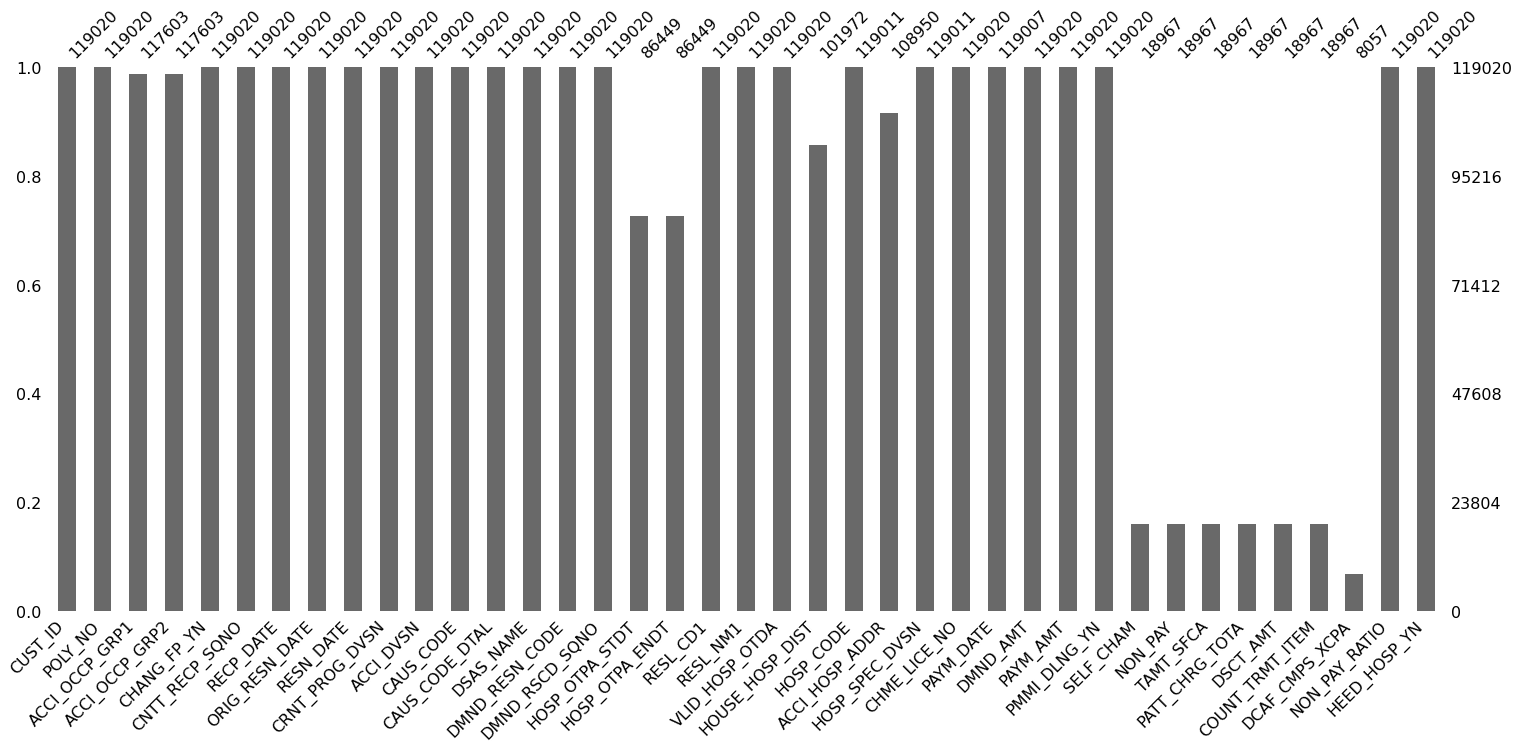

In [51]:
missingno.bar(claim)
plt.show()

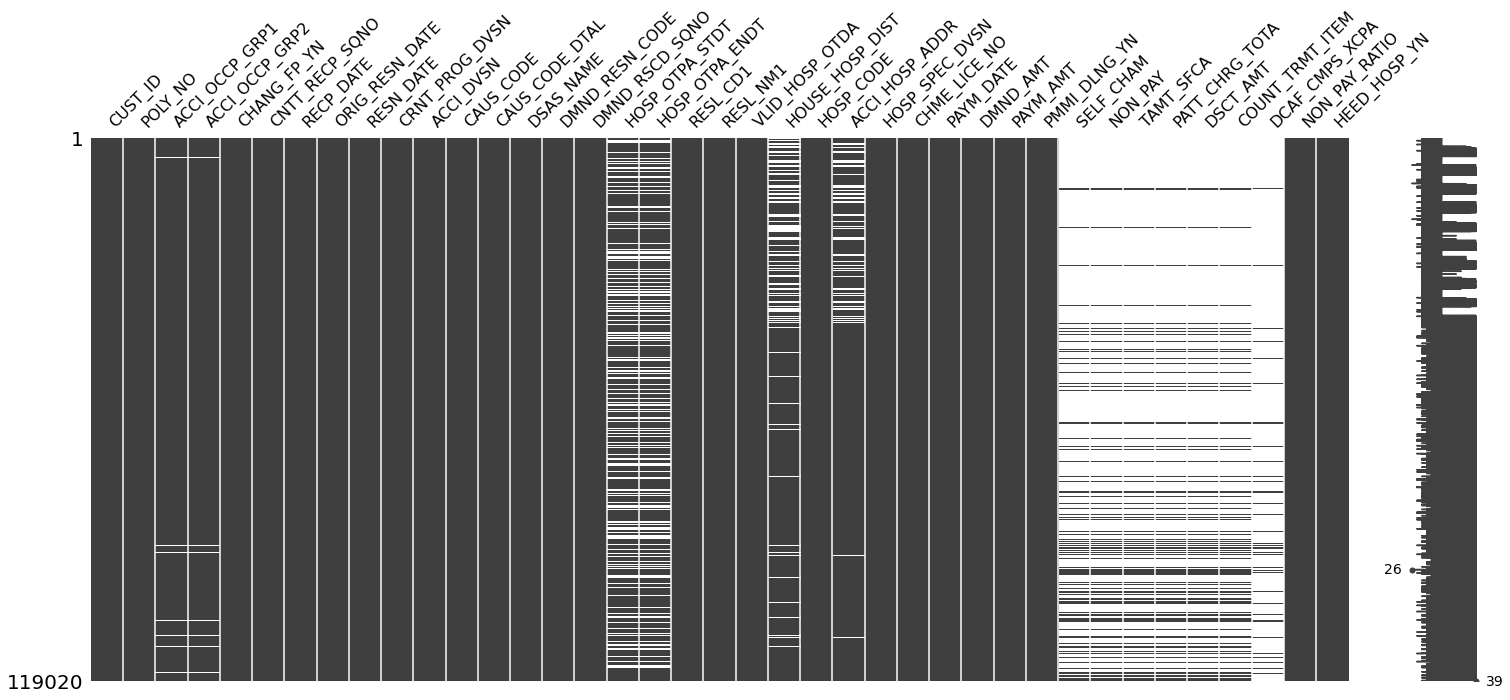

In [53]:
missingno.matrix(claim)
plt.show()

In [54]:
# 1. 결측치 많은 변수 및 날짜 관련 변수 삭제
# null값 많은 변수 삭제
claim.drop(['SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA',
            'DSCT_AMT', 'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA'],axis=1, inplace=True)

# DATE 변수 삭제
claim.drop(['HOSP_OTPA_STDT', 'HOSP_OTPA_ENDT'], axis=1, inplace=True)

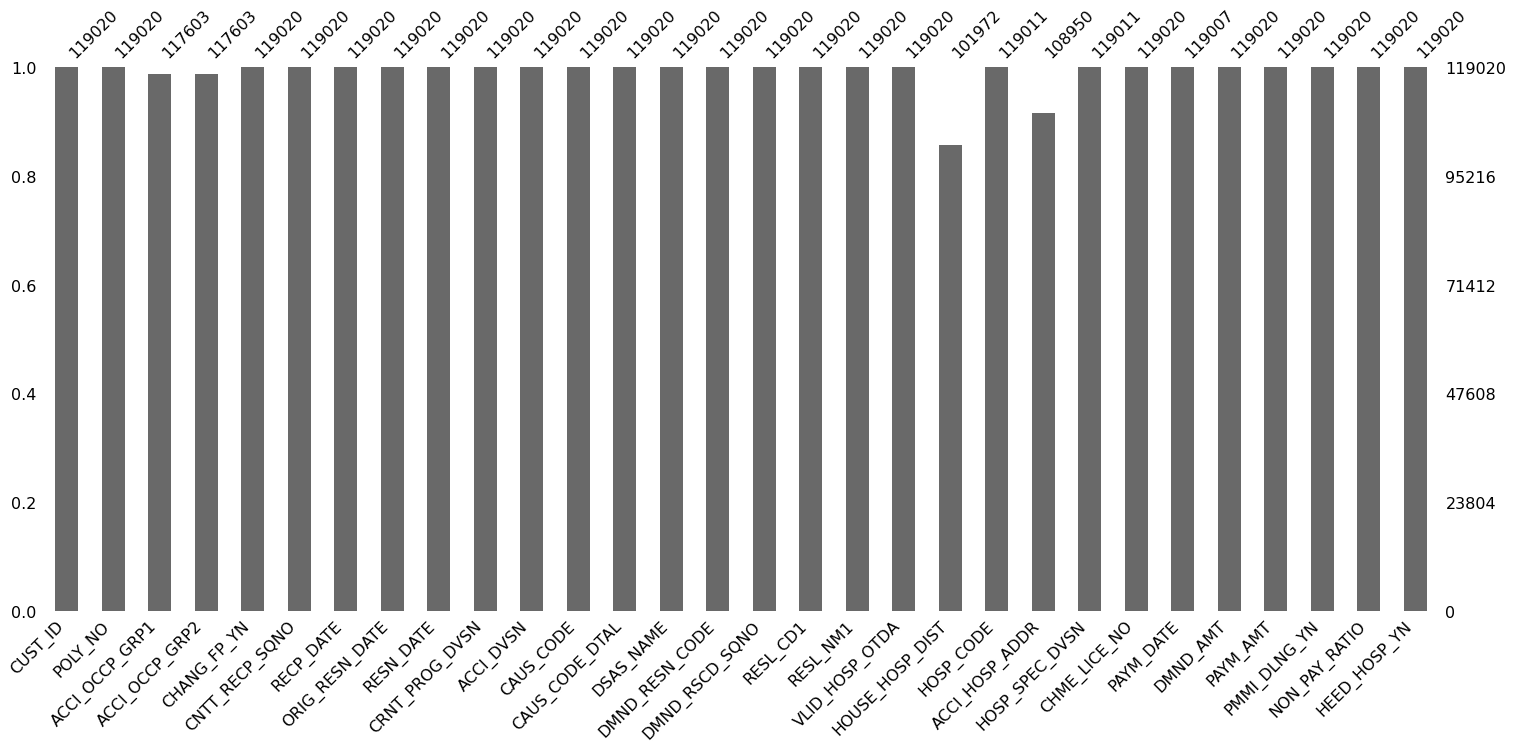

In [55]:
missingno.bar(claim)
plt.show()

In [56]:
# 2. 고객별 평균 입원 일수
claim_df = claim.pivot_table(index='CUST_ID', values='VLID_HOSP_OTDA', aggfunc='mean')
claim_df.reset_index(inplace=True)
cust = pd.merge(cust, claim_df, how='left', on='CUST_ID')
cust.rename(columns={"VLID_HOSP_OTDA": "HOSP_DAYS"}, inplace=True)

In [57]:
cust.loc[:, ["CUST_ID","HOSP_DAYS"]].head(10)

,CUST_ID,HOSP_DAYS
0,1,1.250000
1,2,2.666667
2,3,16.000000
3,4,0.000000
4,5,25.000000
5,6,2.000000
6,7,32.444444
7,8,2.100000
8,9,1.500000
9,12,5.000000


In [58]:
# 3. 고객별 유의병원 출입여부
id_heed = claim[claim['HEED_HOSP_YN']=='Y']['CUST_ID'].unique()
id_heed

array([15218,  2657, 19568, ...,  7768,  3853, 17945], dtype=int64)

In [59]:
cust['HEED_HOSP'] = np.nan
cust['HEED_HOSP'][cust['CUST_ID'].isin(id_heed)] = 1
cust['HEED_HOSP'].fillna(0, inplace=True)
cust['HEED_HOSP'].value_counts()

0.0    21224
1.0     1176
Name: HEED_HOSP, dtype: int64

In [60]:
# 4. 고객별 청구횟수
청구횟수 = claim.pivot_table(index='CUST_ID', values='POLY_NO', aggfunc='count').reset_index()
청구횟수.columns = ['CUST_ID', 'CLAIM_COUNT']
cust = pd.merge(cust, 청구횟수, on='CUST_ID', how='left')

In [61]:
# 5. 의사별 사기비율
# 의사별 사기수/전체청구수
data = pd.merge(claim, cust[['CUST_ID', 'SIU_CUST_YN']],how='left', on='CUST_ID')
의사별전체 = data.pivot_table(index=['CHME_LICE_NO'], values='POLY_NO',aggfunc='count').reset_index()

의사별_YN = data.pivot_table(index=['CHME_LICE_NO', 'SIU_CUST_YN'],values='POLY_NO',aggfunc='count').reset_index()
의사별_YN = 의사별_YN[의사별_YN['SIU_CUST_YN']=='Y']

의사별전체 = pd.merge(의사별전체, 의사별_YN, how='left', on='CHME_LICE_NO')
의사별전체['DOC_SIU_RATIO'] = 의사별전체['POLY_NO_y']/의사별전체['POLY_NO_x']
의사별전체.fillna(0, inplace=True)

의사별사기비율 = 의사별전체[['CHME_LICE_NO', 'DOC_SIU_RATIO']]
의사별사기비율.head(5)

,CHME_LICE_NO,DOC_SIU_RATIO
0,6,0.0
1,7,0.0
2,8,1.0
3,9,0.0
4,10,0.0


In [62]:
# CUST_ID 별 의사사기비율 max
df_lice = claim.pivot_table(index=['CUST_ID', 'CHME_LICE_NO'], 
                            values='POLY_NO', aggfunc='count').reset_index()
df_lice = pd.merge(data, 의사별사기비율, how='left', on='CHME_LICE_NO')

idlice_ratio = df_lice.pivot_table(index='CUST_ID', 
                                   values='DOC_SIU_RATIO',aggfunc='max').reset_index()
idlice_ratio.head()

,CUST_ID,DOC_SIU_RATIO
0,1,0.101358
1,2,0.800000
2,3,0.000000
3,4,0.142857
4,5,0.176471


In [63]:
cust = pd.merge(cust, idlice_ratio, how='left', on='CUST_ID')
cust.loc[:, ["CUST_ID", "HOSP_DAYS", "CLAIM_COUNT", "DOC_SIU_RATIO"]].head()

,CUST_ID,HOSP_DAYS,CLAIM_COUNT,DOC_SIU_RATIO
0,1,1.250000,4,0.101358
1,2,2.666667,3,0.800000
2,3,16.000000,1,0.000000
3,4,0.000000,9,0.142857
4,5,25.000000,1,0.176471


In [66]:
# 6. 병원별 사기비율
# 병원별 사기수/전체청구수
병원별전체 = data.pivot_table(index=['HOSP_CODE'],values='POLY_NO', aggfunc='count').reset_index()

병원별_YN = data.pivot_table(index=['HOSP_CODE', 'SIU_CUST_YN'],
                          values='POLY_NO', aggfunc='count').reset_index()
병원별_YN = 병원별_YN[병원별_YN['SIU_CUST_YN']=='Y']

병원별전체 = pd.merge(병원별전체, 병원별_YN, how='left', on='HOSP_CODE')
병원별전체['HOSP_SIU_RATIO'] = 병원별전체['POLY_NO_y'] / 병원별전체['POLY_NO_x']
병원별전체.fillna(0, inplace=True)

병원사기비율 = 병원별전체[['HOSP_CODE', 'HOSP_SIU_RATIO']]
병원사기비율.head(10)

,HOSP_CODE,HOSP_SIU_RATIO
0,2.0,0.741935
1,3.0,0.042308
2,4.0,0.129870
3,5.0,0.054054
4,6.0,0.076220
5,7.0,0.000000
6,8.0,0.007326
7,9.0,0.125000
8,10.0,0.048193
9,11.0,0.272727


In [67]:
# CUST_ID 별 병원 사기비율 max
df_hosp = claim.pivot_table(index=['CUST_ID', 'HOSP_CODE'],
                            values='POLY_NO', aggfunc='count').reset_index()
df_hosp = pd.merge(data, 병원사기비율, how='left', on='HOSP_CODE')

idhosp_ratio = df_hosp.pivot_table(index='CUST_ID',
                                   values='HOSP_SIU_RATIO', aggfunc='max').reset_index()
idhosp_ratio.head()

,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


In [68]:
cust = pd.merge(cust, idhosp_ratio, how='left', on='CUST_ID')
cust.loc[:, ["CUST_ID", "HOSP_SIU_RATIO"]].head()

,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


In [69]:
# 7. 의사 사기 비율 * 병원 사기 비율
# 의사 사기 비율 * 병원 사기 비율
cust['HOSP_DOC_SIU'] = cust['DOC_SIU_RATIO'] * cust['HOSP_SIU_RATIO']
cust.loc[:, ["CUST_ID", "DOC_SIU_RATIO", "HOSP_SIU_RATIO", "HOSP_DOC_SIU"]].head()

,CUST_ID,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU
0,1,0.101358,0.200000,0.020272
1,2,0.800000,0.428571,0.342857
2,3,0.000000,0.000000,0.000000
3,4,0.142857,0.000000,0.000000
4,5,0.176471,0.354183,0.062503


In [70]:
# 8. 각 ACCI_DVSN / 청구횟수 비율
acci_claim = claim.pivot_table(index=['CUST_ID', 'ACCI_DVSN'],
                               values='POLY_NO', aggfunc='count').unstack(1).reset_index()
acci_claim = acci_claim.values
acci_claim = pd.DataFrame(acci_claim)
acci_claim.fillna(0, inplace=True)
acci_claim.columns = ['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']
acci_claim.head()

,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1.0,0.0,0.0,4.0
1,2.0,0.0,0.0,3.0
2,3.0,0.0,1.0,0.0
3,4.0,9.0,0.0,0.0
4,5.0,0.0,1.0,0.0


In [71]:
cust = pd.merge(cust, acci_claim, on='CUST_ID', how='left')

cust['ACCI_RATIO_1'] = cust['ACCI_RATIO_1']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_2'] = cust['ACCI_RATIO_2']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_3'] = cust['ACCI_RATIO_3']/cust['CLAIM_COUNT']

cust.loc[:, ['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']].head()

,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1,0.0,0.0,1.0
1,2,0.0,0.0,1.0
2,3,0.0,1.0,0.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


In [72]:
# 9. 사고원인과 청구코드 이용한 파생변수
claim_acci = claim.loc[:, ["CUST_ID", "ACCI_DVSN", "DMND_RESN_CODE"]]
claim_acci["value"] = 1

cust_claim_df = claim_acci.pivot_table(index=["CUST_ID"],
                                       columns=["ACCI_DVSN","DMND_RESN_CODE"],
                                       values=["value"],aggfunc='count', fill_value=0)

cust_claim_df.head()

value                                                           \
ACCI_DVSN          1                       2                 3                  
DMND_RESN_CODE     1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3  4  5  6   
CUST_ID                                                                         
1                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0   
2                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0   
3                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
4                  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
5                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   

                      
ACCI_DVSN             
DMND_RESN_CODE  7  9  
CUST_ID               
1               0  0  
2               0  0  
3               0  0  
4               0  0  
5               0  0

In [73]:
cust_claim_df = cust_claim_df.reset_index(level=["CUST_ID"], col_level=1)
cust_claim_df.columns = cust_claim_df.columns.droplevel(level=0)

cust_claim_df.columns = ['_'.join([str(col) for col in cols]) for cols in cust_claim_df.columns]
cust_claim_df = cust_claim_df.rename(columns={"CUST_ID_": "CUST_ID"})
cust_claim_df.head()

,CUST_ID,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
cust = pd.merge(cust, cust_claim_df, how='left', on='CUST_ID')
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부,HOSP_DAYS,HEED_HOSP,CLAIM_COUNT,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.0,10094,11337.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1.250000,0.0,4,0.101358,0.200000,0.020272,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.0,9143,6509.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2.666667,0.0,3,0.800000,0.428571,0.342857,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.0,0,4180.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,16.000000,0.0,1,0.000000,0.000000,0.000000,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,0.0,4270,5914.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.000000,0.0,9,0.142857,0.000000,0.000000,1.0,0.0,0.0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.0,0,8885.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,25.000000,0.0,1,0.176471,0.354183,0.062503,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### 3.3 최종 데이터프레임 생성

In [75]:
# 1. 표준화
scaling_features = cust[['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM',
                         'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_nd = scaler.fit_transform(scaling_features)

scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
scaled_df.head()

,RESI_COST,TOTALPREM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,0.347296,2.824554,-0.019169,1.259591,1.733306,2.234250
1,1.609678,1.638565,-0.000197,1.990197,1.423768,0.521100
2,-1.063586,-0.084456,-0.184485,0.946282,-1.552162,-0.305314
3,-0.204065,6.679180,1.010419,-0.927297,-0.162332,0.309973
4,-1.063586,-0.265482,-0.153373,0.818090,-1.552162,1.364192


In [76]:
cust.drop(['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM',
           'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM'],
          axis=1, inplace=True) # 표준화하기 전 변수 삭제

cust = pd.concat([cust, scaled_df], axis=1)

def yn2_10(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        pass

cust['SIU_CUST_YN'] = cust['SIU_CUST_YN'].apply(yn2_10)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_ID               22400 non-null  int64  
 1   DIVIDED_SET           22400 non-null  int64  
 2   SIU_CUST_YN           20607 non-null  float64
 3   AGE                   22400 non-null  int64  
 4   CHLD_CNT              22400 non-null  float64
 5   LTBN_CHLD_AGE         22400 non-null  float64
 6   SEX_1                 22400 non-null  int64  
 7   SEX_2                 22400 non-null  int64  
 8   RESI_TYPE_CODE_11.0   22400 non-null  int64  
 9   RESI_TYPE_CODE_12.0   22400 non-null  int64  
 10  RESI_TYPE_CODE_13.0   22400 non-null  int64  
 11  RESI_TYPE_CODE_20.0   22400 non-null  int64  
 12  RESI_TYPE_CODE_30.0   22400 non-null  int64  
 13  RESI_TYPE_CODE_40.0   22400 non-null  int64  
 14  RESI_TYPE_CODE_50.0   22400 non-null  int64  
 15  RESI_TYPE_CODE_60.0

In [77]:
# 2. 전처리 완료한 데이터 저장
cust.to_csv("dataset/completed_preprocessing_CUST_DATA.csv", index=False, encoding="utf-8-sig")

## 4절. Modeling

## 5절. Ensemble

## 6절. 결과 파일 생성

## 7절. 추가 제안